## Crop Recommendation Model 

#### Life Cycle of a Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model

### 1) Problem statement
- The objective of this project is to forecast crop yields to enhance farm management and ensure food security, leveraging machine learning on historical and real-time data.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
- The data consists of 8 columns and 2200 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

2.3.2
2.3.2
1.7.1


#### Import the CSV Data as Pandas DataFrame

In [4]:
crop_data = pd.read_csv("data/crop_recommendation_dataset.csv")

#### Show Top 5 Records

In [5]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### Size of the dataset

In [6]:
crop_data.size

17600

#### Shape of the dataset

In [7]:
crop_data.shape

(2200, 8)

#### Dataset Information

- N : ratio of Nitrogen content in soil
- P : ratio of Phosphorous content in soil
- K : ratio of Potassium content in soil
- temperature : temperature in degree celsius 
- humidity : relative humidty in percentage
- ph : ph value of the soil
- rainfall : rainfall in mm

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:
crop_data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [9]:
crop_data.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [10]:
# Check null and Dtypes
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### 3.5 Check statistics of data set

In [11]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### Insight
- From above description of numerical data, all means are varying from each other.
- All standard deviations are also varying.

### 3.7 Exploring Data

In [12]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [60]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
crop_data['label'].nunique()

22

In [14]:
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [15]:
crop_data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [16]:
corr = crop_data.corr(numeric_only=True)    
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


### 4. Exploring Data ( Visualization )
#### Visualize various distributions to make some conclusion. 
- Heatmap of Correlation
- Temperature Distribution
- Humidity Distribution
- ph Distribution

<Axes: >

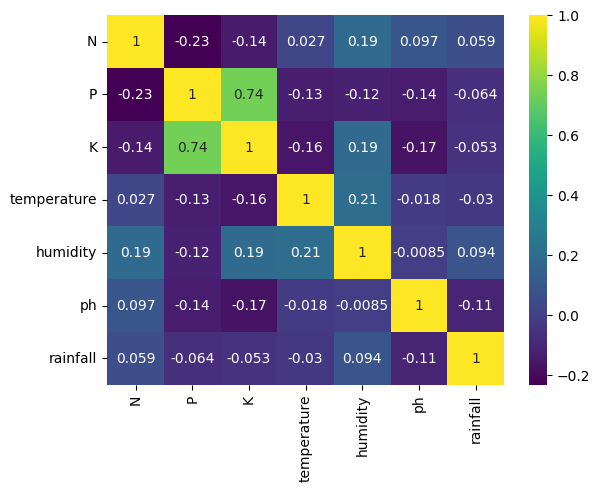

In [17]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='viridis')

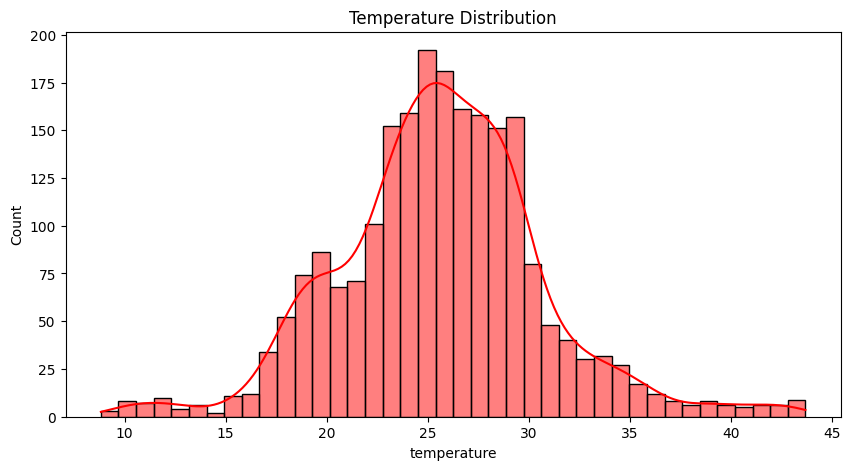

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

sns.histplot(crop_data['temperature'],kde=True,color='red')
plt.title("Temperature Distribution")
plt.show()

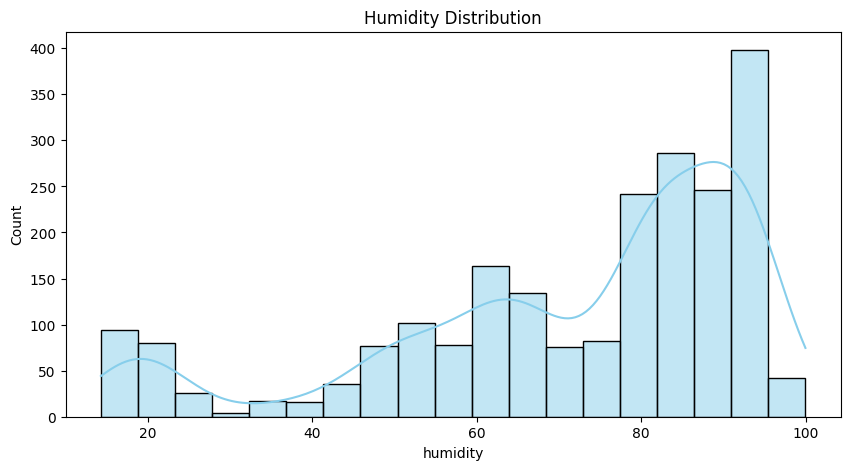

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(crop_data['humidity'],kde=True,color='skyblue')
plt.title("Humidity Distribution")
plt.show()

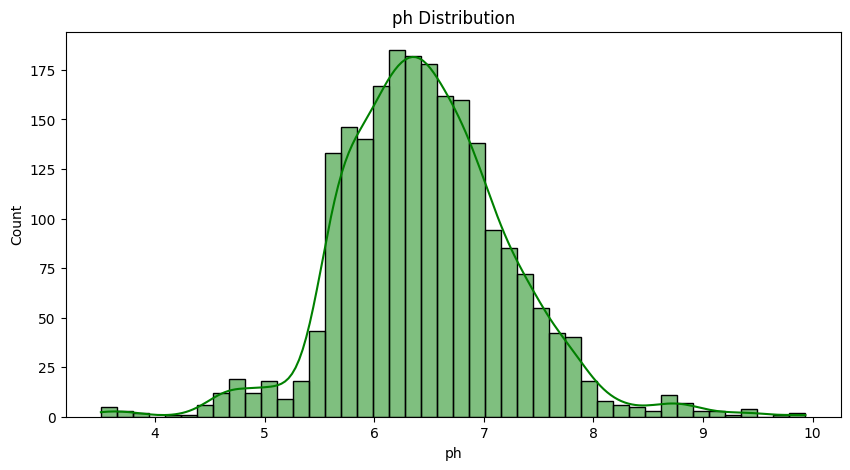

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(crop_data['ph'],kde=True,color='green')
plt.title("ph Distribution")
plt.show()

## Model Training

#### Preparing faetures(X) and target(Y) variables

In [21]:
features = crop_data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop_data['label']
labels = crop_data['label']

In [22]:
features.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [23]:
target.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [24]:
#Separate dataset into train and test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)
Xtrain.shape, Xtest.shape

((1760, 7), (440, 7))

In [25]:
Xtrain

,N,P,K,temperature,humidity,ph,rainfall
1936,113,38,25,22.000851,79.472710,7.388266,90.422242
610,28,35,22,29.530376,86.733460,7.156563,59.872321
372,11,61,21,18.623288,23.024103,5.532101,135.337803
1559,29,139,205,23.641424,93.744615,6.155939,116.691218
1500,24,128,196,22.750888,90.694892,5.521467,110.431786
...,...,...,...,...,...,...,...
1071,105,88,54,25.787498,84.511942,6.020445,114.200546
433,27,71,23,23.453790,46.487148,7.109598,150.871220
674,23,39,22,29.256493,81.979522,6.864839,42.024833
1099,117,81,53,29.507046,78.205856,5.507642,98.125658


In [26]:
Ytrain

1936         cotton
610        mungbean
372     kidneybeans
1559          apple
1500          apple
           ...     
1071         banana
433      pigeonpeas
674        mungbean
1099         banana
1608         orange
Name: label, Length: 1760, dtype: object

### Testing from differenet models and storing accuracy

In [27]:
accuracy = []
model = []

In [28]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(Xtrain,Ytrain)

ypred = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, ypred)
accuracy.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

DecisionTrees's Accuracy is:  98.18181818181819


In [29]:
from sklearn.svm import SVC

SVM = SVC()

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

SVM's Accuracy is:  97.72727272727273


In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

NB = GaussianNB()
NB.fit(Xtrain, Ytrain)
predicted_values = NB.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)

accuracy.append(x)
model.append('Naive Bayes')

print("Naive Bayes' Accuracy is: ", x * 100)


Naive Bayes' Accuracy is:  99.0909090909091


In [31]:

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

Logistic Regression's Accuracy is:  95.22727272727273


In [32]:

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

RF's Accuracy is:  99.31818181818181


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()
knn.fit(Xtrain, Ytrain)
predicted_values_knn = knn.predict(Xtest)
accuracy_knn = metrics.accuracy_score(Ytest, predicted_values_knn)

accuracy.append(accuracy_knn)
model.append('KNN')

print("KNN's Accuracy is: ", accuracy_knn * 100)

KNN's Accuracy is:  97.5


In [37]:
from catboost import CatBoostClassifier
from sklearn import metrics

cb = CatBoostClassifier(verbose=False)
cb.fit(Xtrain, Ytrain)
predicted_values_cb = cb.predict(Xtest)
accuracy_cb = metrics.accuracy_score(Ytest, predicted_values_cb)

accuracy.append(accuracy_cb)
model.append('Catboost')

print("Catboost's Accuracy is: ", accuracy_cb * 100)

Catboost's Accuracy is:  98.86363636363636


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

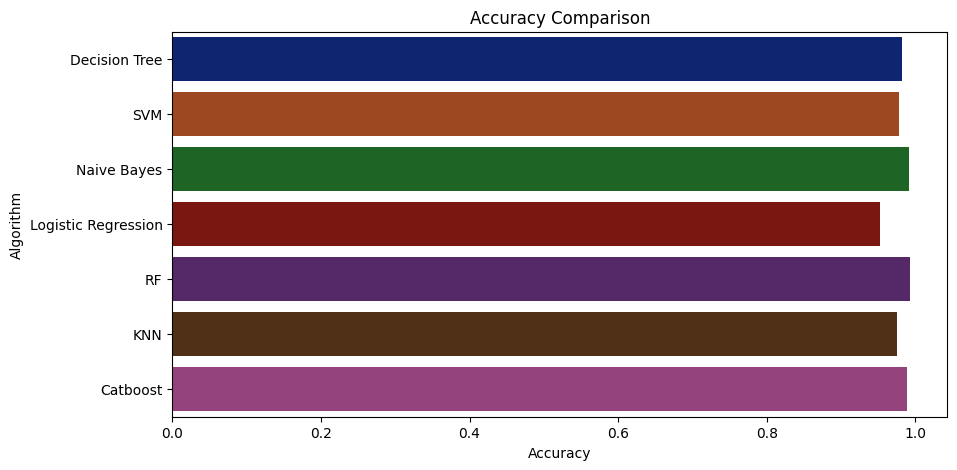

In [38]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy,y = model,palette='dark')

### Results

In [39]:
accuracy_models = dict(zip(model, accuracy))
for k, v in accuracy_models.items():
    print(k, ' - ', round(v * 100, 2))


Decision Tree  -  98.18
SVM  -  97.73
Naive Bayes  -  99.09
Logistic Regression  -  95.23
RF  -  99.32
KNN  -  97.5
Catboost  -  98.86


#### We can see from all the models, "Random Forest Classifier" is giving the best accuracy.

### Predicting output from the best model by giving random inputs.  

In [40]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [41]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [42]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])

    
    prediction = RF.predict(features)
    
    return prediction[0]

In [43]:
recommendation(83, 45, 60, 28, 70.3, 7.0, 150.9)

'jute'

In [44]:

N = 90
P = 42
k = 43
temperature = 21
humidity = 82
ph = 6.5
rainfall = 202


predict = recommendation(N, P, k, temperature, humidity, ph, rainfall)

crop_dict = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

if predict in crop_dict:
    print(f"{predict.capitalize()} is the best crop to be cultivated.")
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")

Rice is the best crop to be cultivated.


In [45]:
import pickle
# Dump the trained Random Forest Classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()